# Introduction
<img src = 'https://cdn-images-1.medium.com/max/900/1*TKr1dtcNgJCA8uYY1OhmSg.png'>

Generative Adversarial Networks (GANs) are generative models. They are uses unsupervised technique to generate new things. GAN models learns pattern in input data in such a way that they can generate new sample which resemble with the input data. The main aim of generative adversarial network is to match generated distribution with the original data distribution.

GANs are an exciting and rapidly changing field, delivering generative models ability to generate realistic examples across a range of problem domains, most notably in image-to-image translation tasks such as translating photos of summer to winter or day to night,coloring images and in generating fake photos that even human cannot categorized as fake image.
This <a href = 'https://thispersondoesnotexist.com/'> site </a> uses GAN to generate fake human faces which are similar to real human

### Components of GANs
<b> Generator </b>: Generator are neural network that learns to generate data which resemble with the input distribution. The generator model take fixed dimension random vector from Gaussian distribution as input and generate the sample out of it which resemble with input.

<b> Discriminator </b>: Discriminator are simple neural network that distinguish fake and real data.The discriminator model takes an example from the domain as input (real or generated) and predicts a binary class label of real or fake.

Generative adversarial networks are based on a game theoretic scenario in which the generator network must compete against an adversary. The generator network directly produces samples. Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.

# Working of GANs
<img src = 'https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11000153/g1.jpg'>

First of all we take batch of random vector from the Gaussian distribution and generate fake image out of it using generator. Since generator isn't trained so generated image donot resemble with the real input distribution. We take batches of image from the input distribution along with generated fake images and fed it to discriminator so that it learns to distinguish between real and fake images.
Now, after training discriminator, we take the batch of images that generator generated and fed them through discriminator again (here we donot fed real images), discriminator will provide an output probabilities, these values are then compared with the probability that the generator should generated (ie 1), error is calculated and backpropagated through the generator and the weight are updated.
This above process is repeated until generated images resemble with the input distribution.

## Application of GANs

## 1. Generating fake faces
<img src = "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Examples-of-Photorealistic-GAN-Generated-Faces.png">

## 2. Generate Examples for Image Datasets

## 3. Face Aging
<img src = 'https://www.baycare.net/media/5076/botox-aging-face-plastic-surgery.jpg' height = '600px' width = '500px'>



## 4. Super Resolution
<img src = 'https://miro.medium.com/max/700/1*E-JmUwv7zbwjzFm1hJLxPA.png'>


## 5. Image-to-Image Translation
<img src = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Photographs-of-Daytime-Cityscapes-to-Nighttime-with-pix2pix.png'>

## 6.  Photos to Emojis
<img src = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Celebrity-Photographs-and-GAN-Generated-Emojis.png'>




## 7.Text to image Translation

<img src = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Textual-Descriptions-and-GAN-Generated-Photographs-of-Birds.png'>


## 8. Generate Cartoon characters
<img src = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-GAN-Generated-Anime-Character-Faces.png'>
   


## Objective: To generate fake faces of human

## Import necessary Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import glob

# Set the path to the folder containing the training images
train_path = 'data_processed/filtered/train/disgust'

# Create a list of all the image file paths in the angry folder
image_paths = glob.glob(os.path.join(train_path, '*.jpg'))

# Create a Pandas dataframe with the image file paths and class labels
df_train = pd.DataFrame({'filepath': image_paths, 'class': 'disgust'})
# Define the image size and batch size
img_height, img_width = 32,32
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale pixel values to [0, 1]
    rotation_range=20, # randomly rotate images by up to 20 degrees
    width_shift_range=0.1, # randomly shift the image horizontally by up to 10%
    height_shift_range=0.1, # randomly shift the image vertically by up to 10%
    horizontal_flip=True, # randomly flip images horizontally
    zoom_range=0.1, # randomly zoom images by up to 10%
    validation_split=0.2
)

# Create a flow_from_directory generator for the training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath', # column containing the file paths
    y_col='class', # path to the training data folder
    target_size=(img_height, img_width), # resize the images to the specified size
    batch_size=batch_size, # set the batch size
    class_mode='categorical', # set the class mode to categorical
    shuffle=True, # shuffle the data for training
    color_mode='grayscale',
    subset='training',
    seed = 12

)

2023-04-13 19:48:24.325819: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 19:48:24.376105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 19:48:24.376681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 19:48:25.482790: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NameError: name 'os' is not defined

In [9]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import confusion_matrix, classification_report
  

## Load data
Here I have used face-mask-lite-dataset, out of available 10000 images i have only use 9090 image. I have read image using opencv since opencv reads image in bgr format i have converted it back to rgb format using cvtColor function. These images are resize into 128 by 128 using resize function and are finally converted to array and are appended in empty array

In [13]:
import torch
import torchvision.transforms as transforms
import os
from tqdm import tqdm
import re
import cv2
import numpy as np

# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

# defining the size of the image
SIZE = 128
_img = []
path = 'data_processed/filtered/train/disgust'
files = os.listdir(path)
files = sorted_alphanumeric(files)

for i in tqdm(files):
    if i == 'seed9090.png':
        break
    else:    
        img = cv2.imread(os.path.join(path, i), 1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = (img - 127.5) / 127.5
        imh = img.astype(float)
        _img.append(np.transpose(img, (2, 0, 1)))
        
_img = np.array(_img, dtype=np.float32)
_img = torch.tensor(_img, dtype=torch.float32)
dataset = torch.utils.data.TensorDataset(torch.tensor(_img))


100%|██████████| 431/431 [00:00<00:00, 1932.51it/s]
/tmp/ipykernel_7425/2127765672.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(_img))


## Visailze our images

/tmp/ipykernel_7425/4095350155.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(sqr, sqr, i+1)


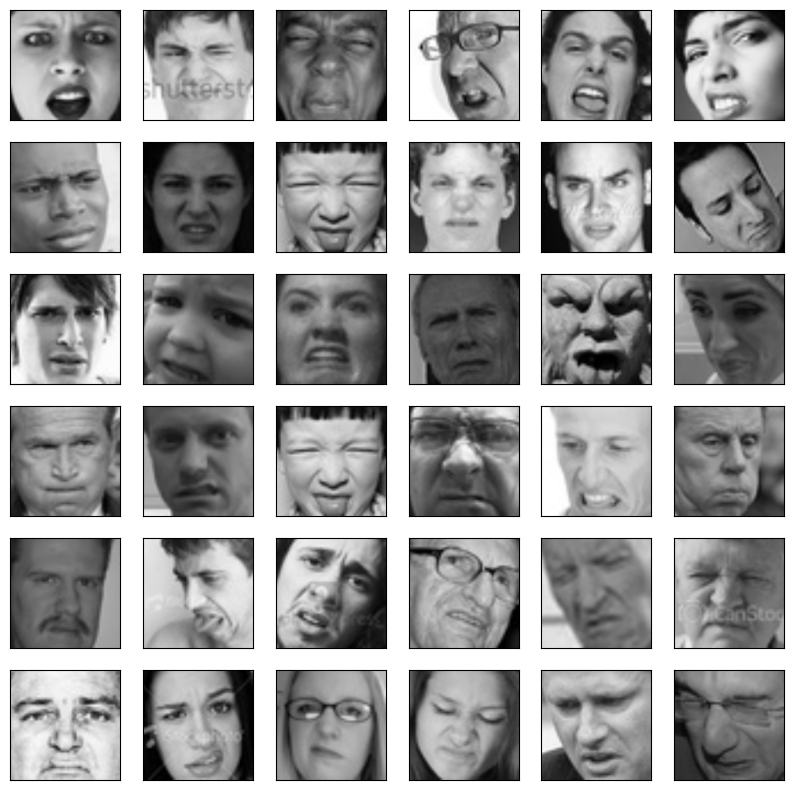

In [14]:
import matplotlib.pyplot as plt

def plot_images(sqr=5):
    plt.figure(figsize=(10, 10))
    plt.title("Real Images", fontsize=35)
    for i in range(sqr * sqr):
        plt.subplot(sqr, sqr, i+1)
        plt.imshow(_img[i].permute(1, 2, 0)*0.5 + 0.5)
        plt.xticks([])
        plt.yticks([])

# to plot images
plot_images(6)

    

Here, i have defined batch size so that these batches of images can be fed directly to the discriminator network

In [63]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms

# Convert the tensor to a numpy ndarray
_img = _img.numpy()
_img = np.transpose(_img, (0, 2, 3, 1)) # Transpose the tensor to (batch_size, height, width, channels)

# Convert the ndarray to PIL Images and apply the transforms
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
_img_transformed = []
for i in range(len(_img)):
    img = Image.fromarray(np.uint8(_img[i]*255))
    img = transform(img)
    _img_transformed.append(img)

# Create the dataset and dataloader
dataset = TensorDataset(*_img_transformed)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size)

# batch_size = 32
# dataset=tf.data.Dataset.from_tensor_slices(np.array(_img)).batch(batch_size)

# Generator 
Here, I have defined generator network. It take random vector from normal distribution as input. This random vector is passed through dense layer and is reshaped and is finally fed through Convolution layers. Here, convolution layers does downsampling of our latent vector, after series of convolution batch normalization and leakyrelu layer our downsampled latent vector is upsampled using Conv2DTranspose.

The final output layer of Generator generate 128 by 128 by 3 image. The final layer of generator uses hyperbolic tangent as activation to squash the value in between -1 and 1. Generator model looks like simple autoencoder model, where input data is downsampled first and is finally upsampled .

In [64]:
import torch.nn as nn

def Generator(latent_dim=100):
    model = nn.Sequential(
        nn.Linear(latent_dim, 128*128, bias=False),
        nn.BatchNorm1d(128*128),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Unflatten(1, (1, 128, 128)),  # reshape to 1 x 128 x 128

        nn.Conv2d(1, 128, kernel_size=4, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 256, kernel_size=4, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.ConvTranspose2d(256, 512, kernel_size=4, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(512, 256, kernel_size=4, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(256, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(128, 128, kernel_size=4, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(128, 1, kernel_size=4, stride=1, padding=1, bias=False),
        nn.Tanh()
    )

    return model


    

In [65]:
generator = Generator()

# Discriminator
Here, discriminator model take 128 by 128 by 3 image that can be real or generated. This input image is downsampled using Convolution layer and is finally flattened and is fed to single neuron so that it can distinguish real and fake image. Since, final layer uses sigmoid function as activation, it output value in between 0 and 1. Here value greater than 0.5 refers to real and less than 0.5 refers to fake image. The output of discriminator is used in training of generator.

In [66]:
import torch
import torch.nn as nn

def Discriminator():
    model = nn.Sequential(
        nn.Conv2d(1, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(128, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(256, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Flatten(),
        nn.Linear(512*4*4, 1),
        nn.Sigmoid()
    )
    return model


In [67]:
discriminator = Discriminator()


### Let's plot image generated by generator before training

In [70]:

# Define hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
num_epochs = 100


# Create the generator and discriminator instances
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG = Generator(latent_dim).to(device)
netD = Discriminator().to(device)

# Define the loss functions
criterion = nn.BCELoss()

# Create the optimizer
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# Define the fixed noise to use for visualization
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)
# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update the discriminator
        netD.zero_grad()
        real = data[0].to(device)
        b_size = real.size(0)
        label = torch.full((b_size,), 1,dtype=torch.float, device=device)
        real = real.unsqueeze(1) # Add channel dimension for grayscale image
        
        output = netD(real).view(-1)
        errD_real = criterion(output, label.float())

        output = netD(real).view(-1)
        errD_real = criterion(output, label.float())
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, latent_dim, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(0)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update the generator
        netG.zero_grad()
        label.fill_(1)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Print the progress
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save the generated images
        if i % 100 == 0:
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
                vutils.save_image(fake, 'fake_samples_epoch_%03d.png' % epoch, normalize=True)

print("Training finished!")




RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 100x16384)

### Defining loss function and optimizer 

In [ ]:
optimizer = tf.keras.optimizers.legacy.RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

/opt/miniconda3/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
def discriminator_loss(fake_output, real_output):
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    return fake_loss + real_loss

### Defining training steps

In [ ]:
def train_steps(images):
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        generated_images = generator(noise)
        fake_output = discriminator(generated_images)
        real_output = discriminator(images)
        
        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(fake_output, real_output)
        
        
    gradient_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)    
    gradient_of_discriminator = disc_tape.gradient(dis_loss, discriminator.trainable_variables)
    
    optimizer.apply_gradients(zip(gradient_of_generator,generator.trainable_variables))
    optimizer.apply_gradients(zip(gradient_of_discriminator, discriminator.trainable_variables))
    
    loss = {'gen loss':gen_loss,
           'disc loss': dis_loss}
    return loss

## function to plot generated images


In [ ]:
def plot_generated_images(square = 5, epochs = 0):
    
    
  plt.figure(figsize = (10,10))
  for i in range(square * square):
    if epochs != 0:    
        if(i == square //2):
            plt.title("Generated Image at Epoch:{}\n".format(epochs), fontsize = 32, color = 'black')
    plt.subplot(square, square, i+1)
    noise = np.random.normal(0,1,(1,latent_dim))
    img = generator(noise)
    plt.imshow(np.clip((img[0,...]+1)/2, 0, 1))
    
    plt.xticks([])
    plt.yticks([])
    plt.grid()

    if epochs != 0:
            plt.savefig('/epoch_{}_img_{}.png'.format(epochs, i+1))
    
  if epochs != 0:
        plt.show()
  else:
        plt.close()

In [ ]:
# load the saved weights for the generator and discriminator
generator.load_weights('generator.h5')
discriminator.load_weights('discriminator.h5')
# rebuild the GAN model with the saved weights


In [ ]:
import time
def train(epochs,dataset):
    gen_loss_list =[]
    disc_loss_list = []
    for epoch in range(epochs):
        start = time.time()
        print("\nEpoch : {}".format(epoch + 1))
        for images in dataset:
            loss = train_steps(images)
            gen_loss_list.append(loss['gen loss'])
            disc_loss_list.append(loss['disc loss'])
        print(" Time:{}".format(np.round(time.time() - start),2)) 
        print("Generator Loss: {} Discriminator Loss: {}".format(loss['gen loss'],loss['disc loss']))

        # Plot the generated images every epoch and save them to disk
        plot_generated_images(epochs=epoch+1)
        
        # Plot the generator and discriminator loss against epochs
        plt.figure(figsize=(10, 5))
        plt.plot(gen_loss_list, label='Generator Loss')
        plt.plot(disc_loss_list, label='Discriminator Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('/losses_plot.png')
        plt.show()
            
        
        
    

## Training

In [ ]:
num_epochs=5
for epoch in range(num_epochs):
    train(epoch+1, dataset)
    plot_generated_images(square=1, epochs=epoch+1)
# i had train model previously for more than 10 epochs so generated images are quiet good


Epoch : 1
 Time:1221.0
Generator Loss: 17.144990921020508 Discriminator Loss: 0.015622238628566265


TypeError: plot_generated_images() got an unexpected keyword argument 'epoch'

# Some Generated Images


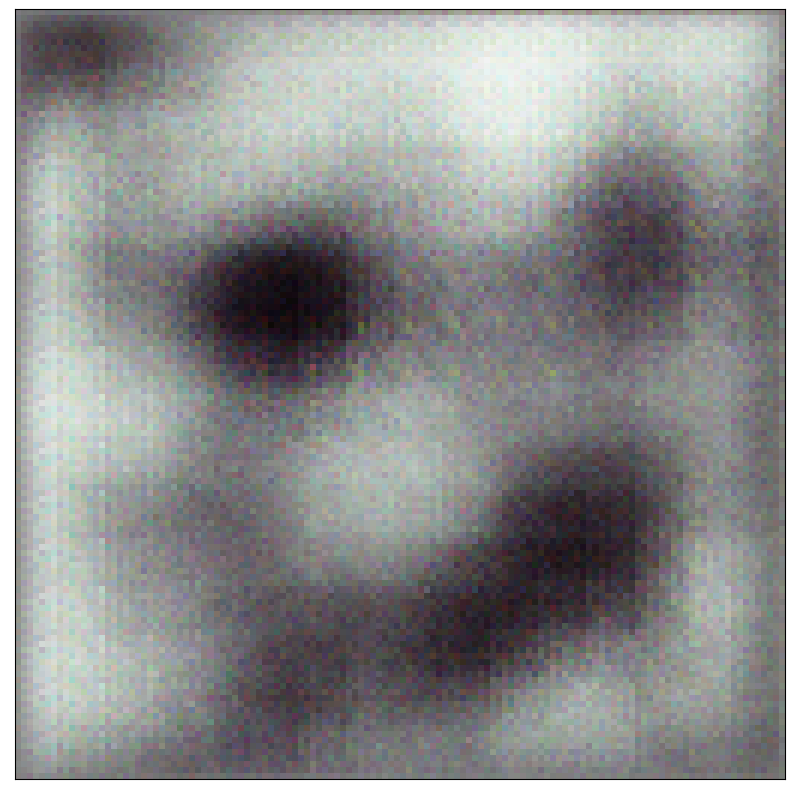

In [ ]:
plot_generated_images(1)

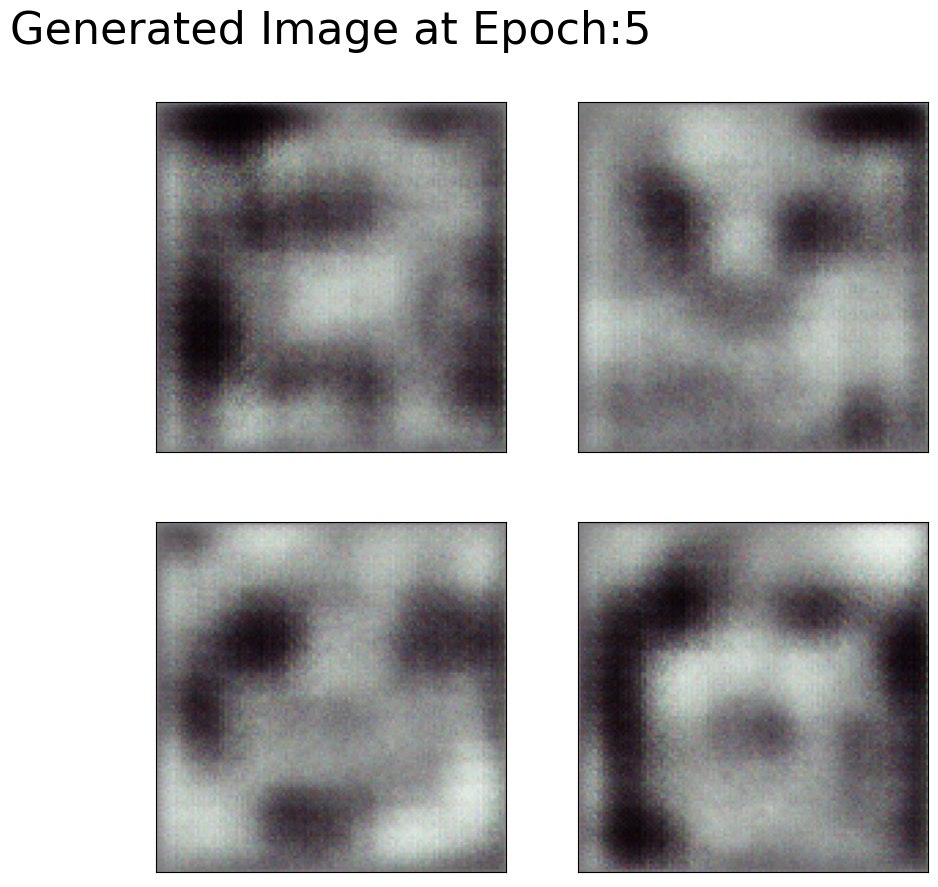

In [ ]:
plot_generated_images(2,5)

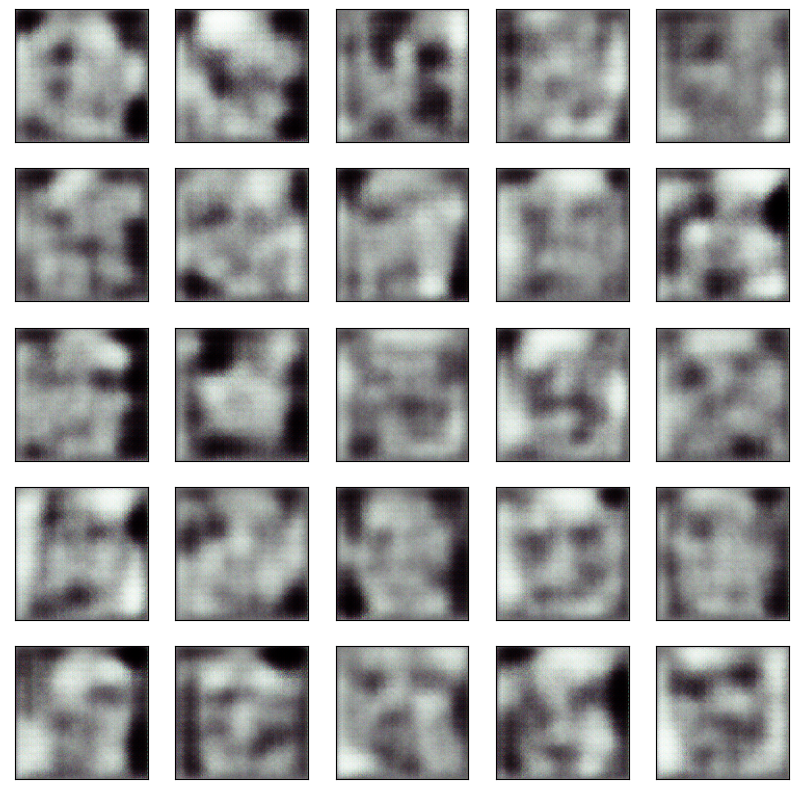

In [ ]:
plot_generated_images(5)

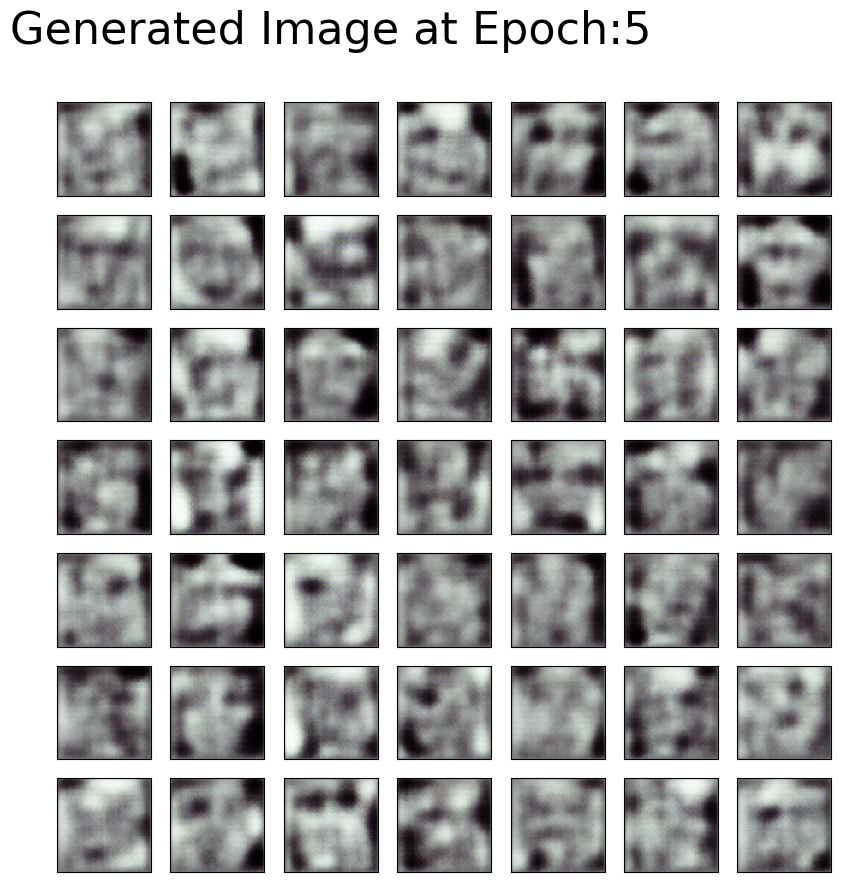

In [ ]:
plot_generated_images(7,5)

In [ ]:
generator.save('generator.h5')
discriminator.save("discriminator.h5")

#### ref: <a href = 'https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/'> machinelearningmastery </a>, <a href = 'https://towardsdatascience.com/generative-adversarial-network-gan-for-dummies-a-step-by-step-tutorial-fdefff170391'> towardsdatascience </a>

### Thanks for your visit
## Any suggestion to improve generated images is really appreciated
## Feel free to comment and upvote.....
# Thank You